In [1]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np

# The sigmoid transfer function and its derivatives

## Derivatives as a function of z

In [2]:
def sigma(z):
    return 1/(1 + exp(-z))

def dsigma_dz(z):
    return exp(-z)/(1 + exp(-z))**2

def d2sigma_dz2(z):
    return 2*exp(-2*z)/(1 + exp(-z))**3 - exp(-z)/(1 + exp(-z))**2

def d3sigma_dz3(z):
    return 6*exp(-3*z)/(1 + exp(-z))**4 - 6*exp(-2*z)/(1 + exp(-z))**3 + exp(-z)/(1 + exp(-z))**2

def d4sigma_dz4(z):
    return 24*exp(-4*z)/(1 + exp(-z))**5 - 36*exp(-3*z)/(1 + exp(-z))**4 + 14*exp(-2*z)/(1 + exp(-z))**3 - exp(-z)/(1 + exp(-z))**2

In [3]:
n = 101
z = np.linspace(-5, 5, n)
s = np.zeros(n)
ds_dz = np.zeros(n)
d2s_dz2 = np.zeros(n)
d3s_dz3 = np.zeros(n)
d4s_dz4 = np.zeros(n)

In [4]:
for i in range(n):
    s[i] = sigma(z[i])
    ds_dz[i] = dsigma_dz(z[i])
    d2s_dz2[i] = d2sigma_dz2(z[i])
    d3s_dz3[i] = d3sigma_dz3(z[i])
    d4s_dz4[i] = d4sigma_dz4(z[i])

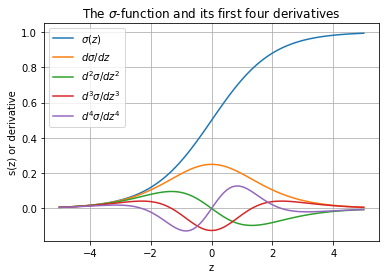

In [5]:
plt.plot(z, s,       label = "$\sigma(z)$")
plt.plot(z, ds_dz,   label = "$d\sigma/dz$")
plt.plot(z, d2s_dz2, label = "$d^2\sigma/dz^2$")
plt.plot(z, d3s_dz3, label = "$d^3\sigma/dz^3$");
plt.plot(z, d4s_dz4, label = "$d^4\sigma/dz^4$");
plt.xlabel("z")
plt.ylabel("s(z) or derivative")
plt.grid()
plt.title("The $\sigma$-function and its first four derivatives")
plt.legend();

### sigma

### dsigma_dz

### d2sigma_dz2

### d3sigma_dz3

### d4sigma_dz4

In [27]:
def run_d4sigma_dz4():
    for i in range(nt):
        tmp[i] = d4sigma_dz4(zt[i])

In [28]:
%timeit run_d4sigma_dz4()

2.39 ms ± 61.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
d4sigma_dz4_v = np.vectorize(d4sigma_dz4)

In [30]:
def run_d4sigma_dz4_v():
    tmp = d4sigma_dz4_v(zt)

In [31]:
%timeit run_d4sigma_dz4_v()

1.21 ms ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Recasting the derivatives as functions of $\sigma$

In [32]:
def s1(s):
    return s - s**2

def s2(s):
    return 2*s**3 - 3*s**2 + s

def s3(s):
    return -6*s**4 + 12*s**3 - 7*s**2 + s

def s4(s):
    return 24*s**5 - 60*s**4 + 50*s**3 - 15*s**2 + s

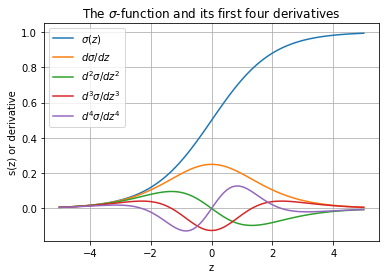

In [33]:
s       = np.zeros(n)
ds_dz   = np.zeros(n)
d2s_dz2 = np.zeros(n)
d3s_dz3 = np.zeros(n)
d4s_dz4 = np.zeros(n)

for i in range(n):
    s[i] = sigma(z[i])
    ds_dz[i]   = s1(s[i])
    d2s_dz2[i] = s2(s[i])
    d3s_dz3[i] = s3(s[i])
    d4s_dz4[i] = s4(s[i])

plt.plot(z, s,       label = "$\sigma(z)$")
plt.plot(z, ds_dz,   label = "$d\sigma/dz$")
plt.plot(z, d2s_dz2, label = "$d^2\sigma/dz^2$")
plt.plot(z, d3s_dz3, label = "$d^3\sigma/dz^3$")
plt.plot(z, d4s_dz4, label = "$d^4\sigma/dz^4$")
plt.xlabel("z")
plt.ylabel("s(z) or derivative")
plt.grid()
plt.title("The $\sigma$-function and its first four derivatives")
plt.legend();

## Errors

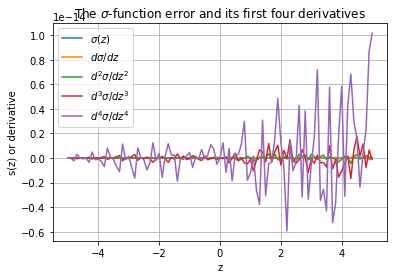

In [34]:
e_s       = np.zeros(n)
e_ds_dz   = np.zeros(n)
e_d2s_dz2 = np.zeros(n)
e_d3s_dz3 = np.zeros(n)
e_d4s_dz4 = np.zeros(n)

for i in range(n):
    e_s[i]       = sigma(z[i]) - sigma(z[i])
    e_ds_dz[i]   = s1(s[i]) - dsigma_dz(z[i])
    e_d2s_dz2[i] = s2(s[i]) - d2sigma_dz2(z[i])
    e_d3s_dz3[i] = s3(s[i]) - d3sigma_dz3(z[i])
    e_d4s_dz4[i] = s4(s[i]) - d4sigma_dz4(z[i])

plt.plot(z, e_s,       label = "$\sigma(z)$")
plt.plot(z, e_ds_dz,   label = "$d\sigma/dz$")
plt.plot(z, e_d2s_dz2, label = "$d^2\sigma/dz^2$")
plt.plot(z, e_d3s_dz3, label = "$d^3\sigma/dz^3$")
plt.plot(z, e_d4s_dz4, label = "$d^4\sigma/dz^4$")
plt.xlabel("z")
plt.ylabel("s(z) or derivative")
plt.grid()
plt.title("The $\sigma$-function error and its first four derivatives")
plt.legend();

## Timing tests for vectorization

As shown below, vectorized versions of these functions are about ??? as fast as the original.

In [75]:
zt_min = -1
zt_max = 1
nt = 1000
zt = np.linspace(zt_min, zt_max, nt)
tmp = np.zeros(nt)
s = np.zeros(nt)

## sigma

In [76]:
def run_sigma():
    for i in range(nt):
        s[i] = sigma(zt[i])

In [77]:
%timeit run_sigma()

447 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [78]:
sigma_v = np.vectorize(sigma)

In [79]:
def run_sigma_v():
    tmp = sigma_v(zt)

In [80]:
%timeit run_sigma_v()

223 µs ± 2.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## dsigma_dz vs s1

In [81]:
def run_dsigma_dz():
    for i in range(nt):
        tmp[i] = dsigma_dz(zt[i])

In [82]:
%timeit run_dsigma_dz()

599 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
dsigma_dz_v = np.vectorize(dsigma_dz)

In [84]:
def run_dsigma_dz_v():
    tmp = dsigma_dz_v(zt)

In [85]:
%timeit run_dsigma_dz_v()

320 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [86]:
def run_s1():
    for i in range(nt):
        tmp[i] = s1(s[i])

In [87]:
%timeit run_s1()

621 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [88]:
s1_v = np.vectorize(s1)

In [89]:
def run_s1_v():
    tmp = s1_v(s)

In [90]:
%timeit run_s1_v()

187 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### d2sigma_dz2 vs s2

In [91]:
def run_d2sigma_dz2():
    for i in range(nt):
        tmp[i] = d2sigma_dz2(zt[i])

In [92]:
%timeit run_d2sigma_dz2()

1.18 ms ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [93]:
d2sigma_dz2_v = np.vectorize(d2sigma_dz2)

In [94]:
def run_d2sigma_dz2_v():
    tmp = d2sigma_dz2_v(zt)

In [95]:
%timeit run_d2sigma_dz2_v()

613 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [96]:
def run_s2():
    for i in range(nt):
        tmp[i] = s2(s[i])

In [97]:
%timeit run_s2()

1.45 ms ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [98]:
s2_v = np.vectorize(s2)

In [99]:
def run_s2_v():
    tmp = s2_v(s)

In [100]:
%timeit run_s2_v()

310 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### d3sigma_dz3 vs s3

In [103]:
def run_d3sigma_dz3():
    for i in range(nt):
        tmp[i] = d3sigma_dz3(zt[i])

In [104]:
%timeit run_d3sigma_dz3()

1.73 ms ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [105]:
d3sigma_dz3_v = np.vectorize(d3sigma_dz3)

In [106]:
def run_d3sigma_dz3_v():
    tmp = d3sigma_dz3_v(zt)

In [107]:
%timeit run_d3sigma_dz3_v()

905 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [108]:
def run_s3():
    for i in range(nt):
        tmp[i] = s3(s[i])

In [109]:
%timeit run_s3()

2.02 ms ± 70.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
s3_v = np.vectorize(s3)

In [114]:
def run_s3_v():
    tmp = s3_v(s)

In [115]:
%timeit run_s3_v()

394 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### d4sigma_dz4 vs s4

In [116]:
def run_d4sigma_dz4():
    for i in range(nt):
        tmp[i] = d4sigma_dz4(zt[i])

In [117]:
%timeit run_d4sigma_dz4()

2.28 ms ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
d4sigma_dz4_v = np.vectorize(d4sigma_dz4)

In [119]:
def run_d4sigma_dz4_v():
    tmp = d4sigma_dz4_v(zt)

In [120]:
%timeit run_d4sigma_dz4_v()

1.19 ms ± 78.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [121]:
def run_s4():
    for i in range(nt):
        tmp[i] = s4(s[i])

In [122]:
%timeit run_s4()

2.62 ms ± 58.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
s4_v = np.vectorize(s4)

In [124]:
def run_s4_v():
    tmp = s4_v(s)

In [125]:
%timeit run_s4_v()

509 µs ± 7.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
